In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [ ]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
from cv2 import cvtColor
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [00:04<00:00, 2379.97it/s]


In [ ]:
data.shape

(22564, 2)

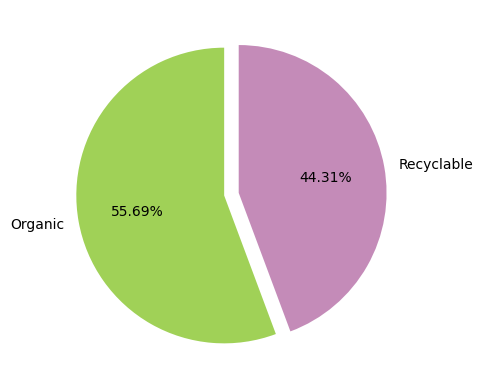

In [ ]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%',
        colors = colors, startangle = 90,  explode=[0.05, 0.05])
plt.show()

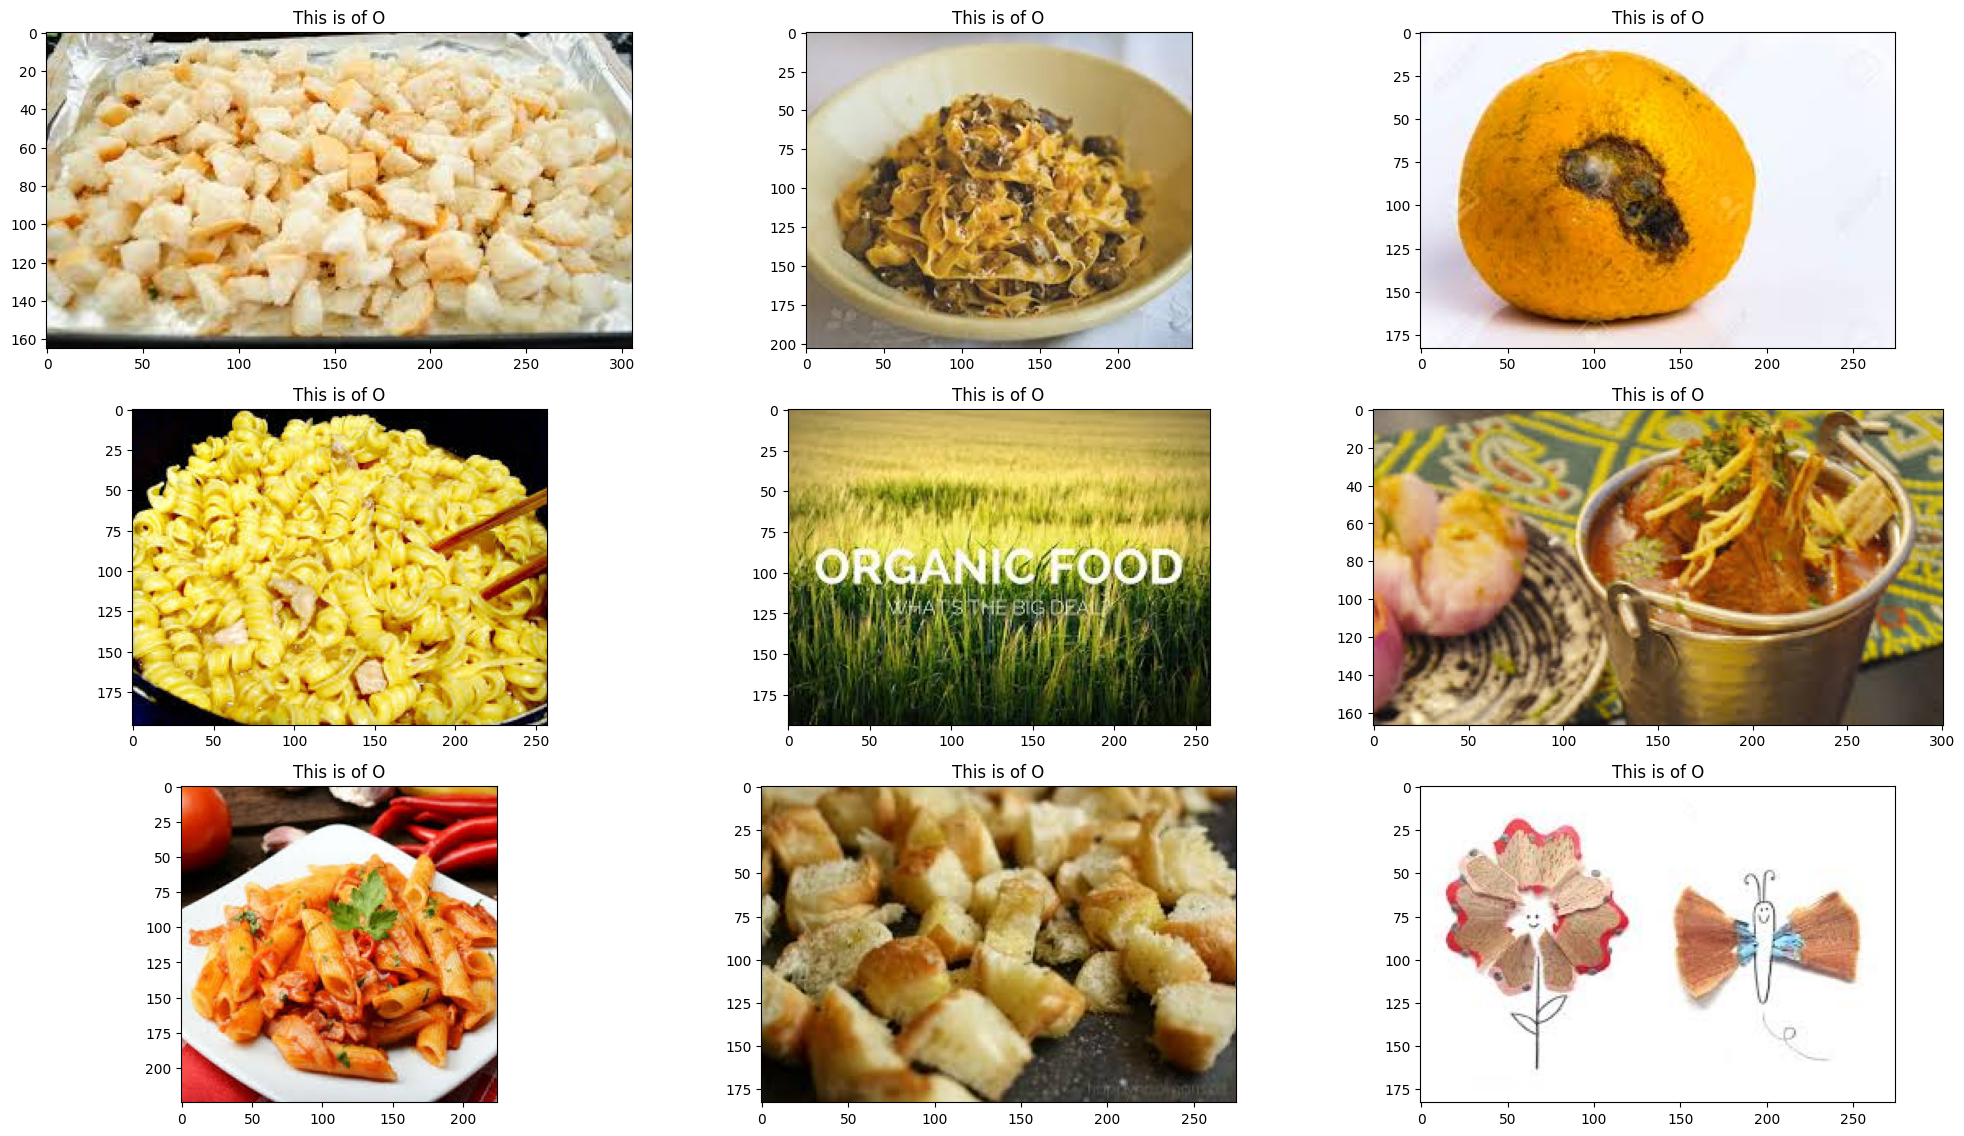

In [ ]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 128

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
model.fit( train_generator, epochs=10, validation_data=test_generator)
model.save("model_CNN.h5")

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 58s 301ms/step - accuracy: 0.7492 - loss: 0.5747 - val_accuracy: 0.8762 - val_loss: 0.3386
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 286ms/step - accuracy: 0.8404 - loss: 0.3979 - val_accuracy: 0.8667 - val_loss: 0.3268
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 287ms/step - accuracy: 0.8612 - loss: 0.3477 - val_accuracy: 0.8774 - val_loss: 0.3042
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 50s 281ms/step - accuracy: 0.8775 - loss: 0.3126 - val_accuracy: 0.8766 - val_loss: 0.3263
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 287ms/step - accuracy: 0.8873 - loss: 0.2891 - val_accuracy: 0.8794 - val_loss: 0.3188
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 285ms/step - accuracy: 0.8951 - loss: 0.2659 - val_accuracy: 0.8886 - val_loss: 0.3175
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 81s 282ms/step - accuracy: 0.9196 - loss: 0.2137 - val_accuracy: 0.8774 - val_loss: 0.3368
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 49s 278ms/step - accuracy: 0.9418 - loss: 0

In [ ]:
model_CNN = model.fit( train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 288ms/step - accuracy: 0.9735 - loss: 0.0774 - val_accuracy: 0.8945 - val_loss: 0.4665
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 288ms/step - accuracy: 0.9803 - loss: 0.0652 - val_accuracy: 0.8886 - val_loss: 0.5652
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 52s 291ms/step - accuracy: 0.9787 - loss: 0.0659 - val_accuracy: 0.8894 - val_loss: 0.5136
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 50s 283ms/step - accuracy: 0.9833 - loss: 0.0524 - val_accuracy: 0.8854 - val_loss: 0.8191
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 289ms/step - accuracy: 0.9894 - loss: 0.0395 - val_accuracy: 0.8961 - val_loss: 0.5645
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 287ms/step - accuracy: 0.9852 - loss: 0.0447 - val_accuracy: 0.8886 - val_loss: 0.7474
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 288ms/step - accuracy: 0.9867 - loss: 0.0409 - val_accuracy: 0.8945 - val_loss: 0.7469
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 51s 288ms/step - accuracy: 0.9890 - loss: 0

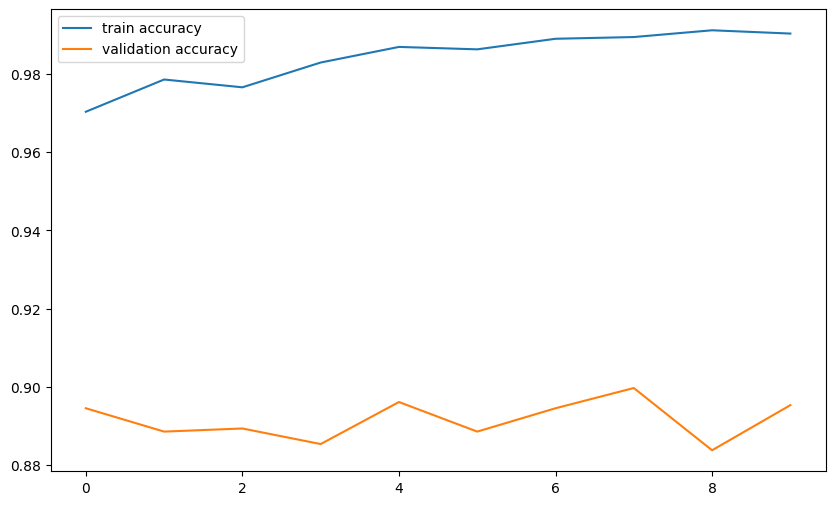

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(model_CNN.history['accuracy'], label = 'train accuracy')
plt.plot(model_CNN.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

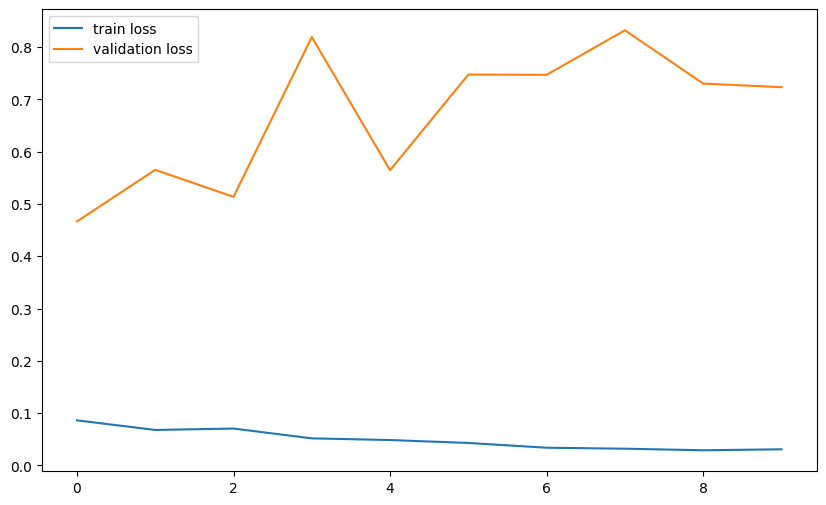

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(model_CNN.history['loss'], label = 'train loss')
plt.plot(model_CNN.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [ ]:
def predict_fun(img):
  plt.figure(figsize = (6,4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print("This is Recyclable Waste")
  else:
    print("This is Organic Waste")

In [ ]:
test_img = cv2.imread('/content/R_10005.jpg')

In [ ]:
predict_fun(test_img)

In [ ]:
test_img = cv2.imread('/content/O_13153.jpg')

In [ ]:
predict_fun(test_img)